<p style="font-size: 200%;color: darkgreen; font-weight: bold; text-align:center">Numerical Simulation Laboratory 2021</p>

<p style="text-align:center"><b>Author:</b> Giacomo Riccardo Hvaring<br>

---

<h1 style="text-align:center"> 3. Black-Scholes theory </h1>

## exercise 3.1 (plain vanilla option pricing simulation)

Black-Scholes theory assumes that the time evolution of the asset price is stochastic and exhibits geometric Brownian motion (GBM) with constant risk-free interest rate $r$ and volatility $\sigma$.

Black-Scholes [analytic solution](https://en.wikipedia.org/wiki/Black–Scholes_model) for the price at time $t<T$:
- European Call-option price:
$$ C\left[ S(t),t \right] = S(t) N(d_1) -K e^{-r(T-t)} N(d_2) $$
- European Put-option price:
$$ C\left[ S(t),t \right] = S(t) \left[ N(d_1)-1\right] -K e^{-r(T-t)} \left[ N(d_2)-1\right]$$

where 
$$d_1 = \frac{1}{\sigma\sqrt{T-t}}\left[ \ln \left( \frac{S(t)}{K} \right) + \left( r+\frac{\sigma^2}{2} (T-t) \right)\right]\;, \quad d_2 = d_1 - \sigma\sqrt{T-t} $$

and
$$ N(x) = \int_{-\infty}^{x} dz \, e^{-\frac{z^2}{2}} = \frac{1}{2} \left[ 1+ {\rm erf} \left( \frac{x}{\sqrt{2}}\right) \right]$$
                                                                                                 
is the cumulative of the Gaussian distribution $\sim \mathcal{N}(\mu=0,\sigma^2=1)$, where  ${\rm erf}(x)$ stands for the error function
    
$$ {\rm erf}(x) = \frac{2}{\sqrt{\pi}}\int_{0}^{x} dz \, e^{-z^2}$$

Use the following parameters: 
- asset price at $t=0$: $S(0)=100$
- delivery time: $T=1$
- strike price: $K=100$
- risk-free interest rate: $r=0.1$
- volatility: $\sigma=0.25$

to compute at time $t=0$ **via Monte Carlo** the European call-option price, $C[S(0),0]$, and put-option price, $P[S(0),0]$:

1. sampling **directly** the final asset price $S(T)$ for a ${\rm GBM}(r,\sigma^2)$
2. sampling the discretized ${\rm GBM}(r,\sigma^2)$ path of the asset price

dividing $[0,T]$ in $100$ time intervals: $S(0)$, $S(t_1)$, $S(t_2)$, ... up to $S(t_{100}=T=1)$
    
<p class="assignement"> Plot the estimation of the European call-option prices, $C[S(0),0]$ (direct and discretized), and put-option prices, $P[S(0),0]$ (direct and discretized), with their uncertainties as a function of the number of blocks $N$. Use a large number of asset prices at time $t=T$, say $M\ge 10^4$. As usual, in computing statistical uncertainties, use data blocking.</p>
    
<p class="remark"> Given an asset price $S\sim GBM(\mu,\sigma^2)$, with initial value $S(0)$, then
<br><br>$$S(t) = S(0) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)t+\sigma W(t)\right]\;, \quad {\rm where}\; W(t)\sim\mathcal{N}(0,t)$$
<br>Moreover, since the increments of $W$ are independent and normally distributed, the simple recursive procedure for sampling discretized values of $S\sim GBM(\mu,\sigma^2)$ at $t_1 < t_2 < … < t_n$ is:
<br><br>$$S(t_{i+1}) = S(t_i) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)(t_{i+1}-t_i)
    +\sigma Z_{i+1}\sqrt{t_{i+1}-t_i}\right]\;,\quad {\rm with} \; Z_i \sim \mathcal{N}(0,1)$$
</p>

In [1]:
from libsim import *                        # module containing some handy functions for the labs

results_directory += "lab_03/"              # where to look for the data
HTML(custom_css())                          # custom notebook appearance (do not suppress output)

In [2]:
from scipy.special import erf
from numpy import log, exp, sqrt

# data
S0 = 100.
K = 100.
T = 1.
r = 0.1
sigma = 0.25
t=0

def N(x):
    return 0.5 * (1. + erf(x / sqrt(2.)))

def black_scholes(S0, K, T, r, sigma):
    d1 = 1./(sigma * sqrt(T)) * (log(S0 / K) + (r + (sigma**2) / 2.) * T)
    d2 = d1 - sigma * sqrt(T)
    C = S0 * N(d1) - K * exp(-r * T) * N(d2)
    P = S0 *(N(d1) - 1.) - K * exp(-r * T) * (N(d2)-1.)
    return C, P

if __name__ == "__main__":
    call, put = black_scholes(S0, K, T, r, sigma)
    print(" == BLACK-SCHOLES ==")
    print("call: ", call)
    print("put: ", put)

 == BLACK-SCHOLES ==
call:  14.975790778311286
put:  5.4595325819072364


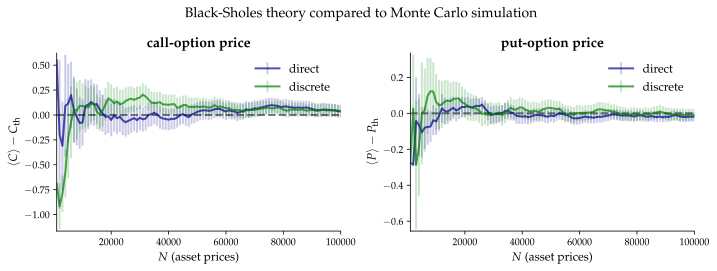

In [4]:
suptitle = "Black-Sholes theory compared to Monte Carlo simulation"
options = ["call", "put"]
methods = ["direct", "discrete"]
colors = ["darkblue", "green"]
xlabel = "$N$ (asset prices)"
ylabels = ["$\langle C\\rangle - C_{\\rm th}$", "$\langle P\\rangle - P_{\\rm th}$"]
expected_ys = [call, put]

fig, ax = plt.subplots(1, 2, figsize=(10,3.8))
fig.suptitle(suptitle)
for axis, option, ylabel, exp_y in zip(ax, options, ylabels, expected_ys):
    title = option + "-option price"
    set_labels(axis, title, xlabel, ylabel)
    for method, color in zip(methods, colors):
        file = results_directory + option + '_' + method + ".dat"
        estimation_plot(axis, file, exp_y, color=color, alpha=.7, label=method)
    axis.legend();